### Plots related to step1

just for plotting, can be skipped if not of interest\
visualize the unsp and sp data of all seqscope liver tiles

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle

#### Load data

In [3]:
# load step1's output data
outfile = 'output_step1/unsp_dict.pkl'
# load
with open(outfile, 'rb') as f:
    pickle_dict = pickle.load(f)
unsp_df = pickle_dict['unsp_df'] 
sp_df = pickle_dict['sp_df'] 

print(unsp_df.head())
print(sp_df.head())
print(unsp_df.tile.nunique())
print(sp_df.tile.nunique())

   tile      y      x   umi
0  2104   6995  17656  1853
1  2117  11128  15518     1
2  2102  28217  19164     1
3  2103  16048  18931     1
4  2117  25999  19552     1
   tile      y      x  umi
0  2104   6995  17656  199
1  2119  18707  15408    1
2  2119  20685   9510    1
3  2104  25803  11295    4
4  2104  10064  16363    4
10
10


#### Define colormaps with alpha (transparency) params

In [7]:
##### define alpha colormaps
# black alpha
color_array = np.zeros([10,4])
color_array[:,-1] = np.linspace(0,0.1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='black_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)
# red alpha
color_array = np.zeros([10,4])
color_array[:,0] = 1
color_array[:,-1] = np.linspace(0,1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='red_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)
# green alpha
color_array = np.zeros([10,4])
color_array[:,1] = 1
color_array[:,-1] = np.linspace(0,1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='green_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)
# blue alpha
color_array = np.zeros([10,4])
color_array[:,1] = 1
color_array[:,2] = 1
color_array[:,-1] = np.linspace(0,1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='blue_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)
# pink alpha
color_array = np.zeros([10,4])
color_array[:,0] = 1
color_array[:,2] = 1
color_array[:,-1] = np.linspace(0,1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='pink_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)
# orange alpha/
color_array = np.zeros([10,4])
color_array[:,0] = 1
color_array[:,1] = 0.39
color_array[:,2] = 0.28
color_array[:,-1] = np.linspace(0,1,10)
map_object = colors.LinearSegmentedColormap.from_list(name='orange_alpha', colors=color_array)
plt.register_cmap(cmap=map_object)

#### List of unique tiles

In [8]:
##### list of unique tiles
tileList = np.sort(unsp_df.tile.unique()).tolist()
print(tileList)

#### groupby tile
unsp_gbtile = unsp_df.groupby('tile')
sp_gbtile = sp_df.groupby('tile')

[2102, 2103, 2104, 2105, 2106, 2107, 2116, 2117, 2118, 2119]


#### Plots

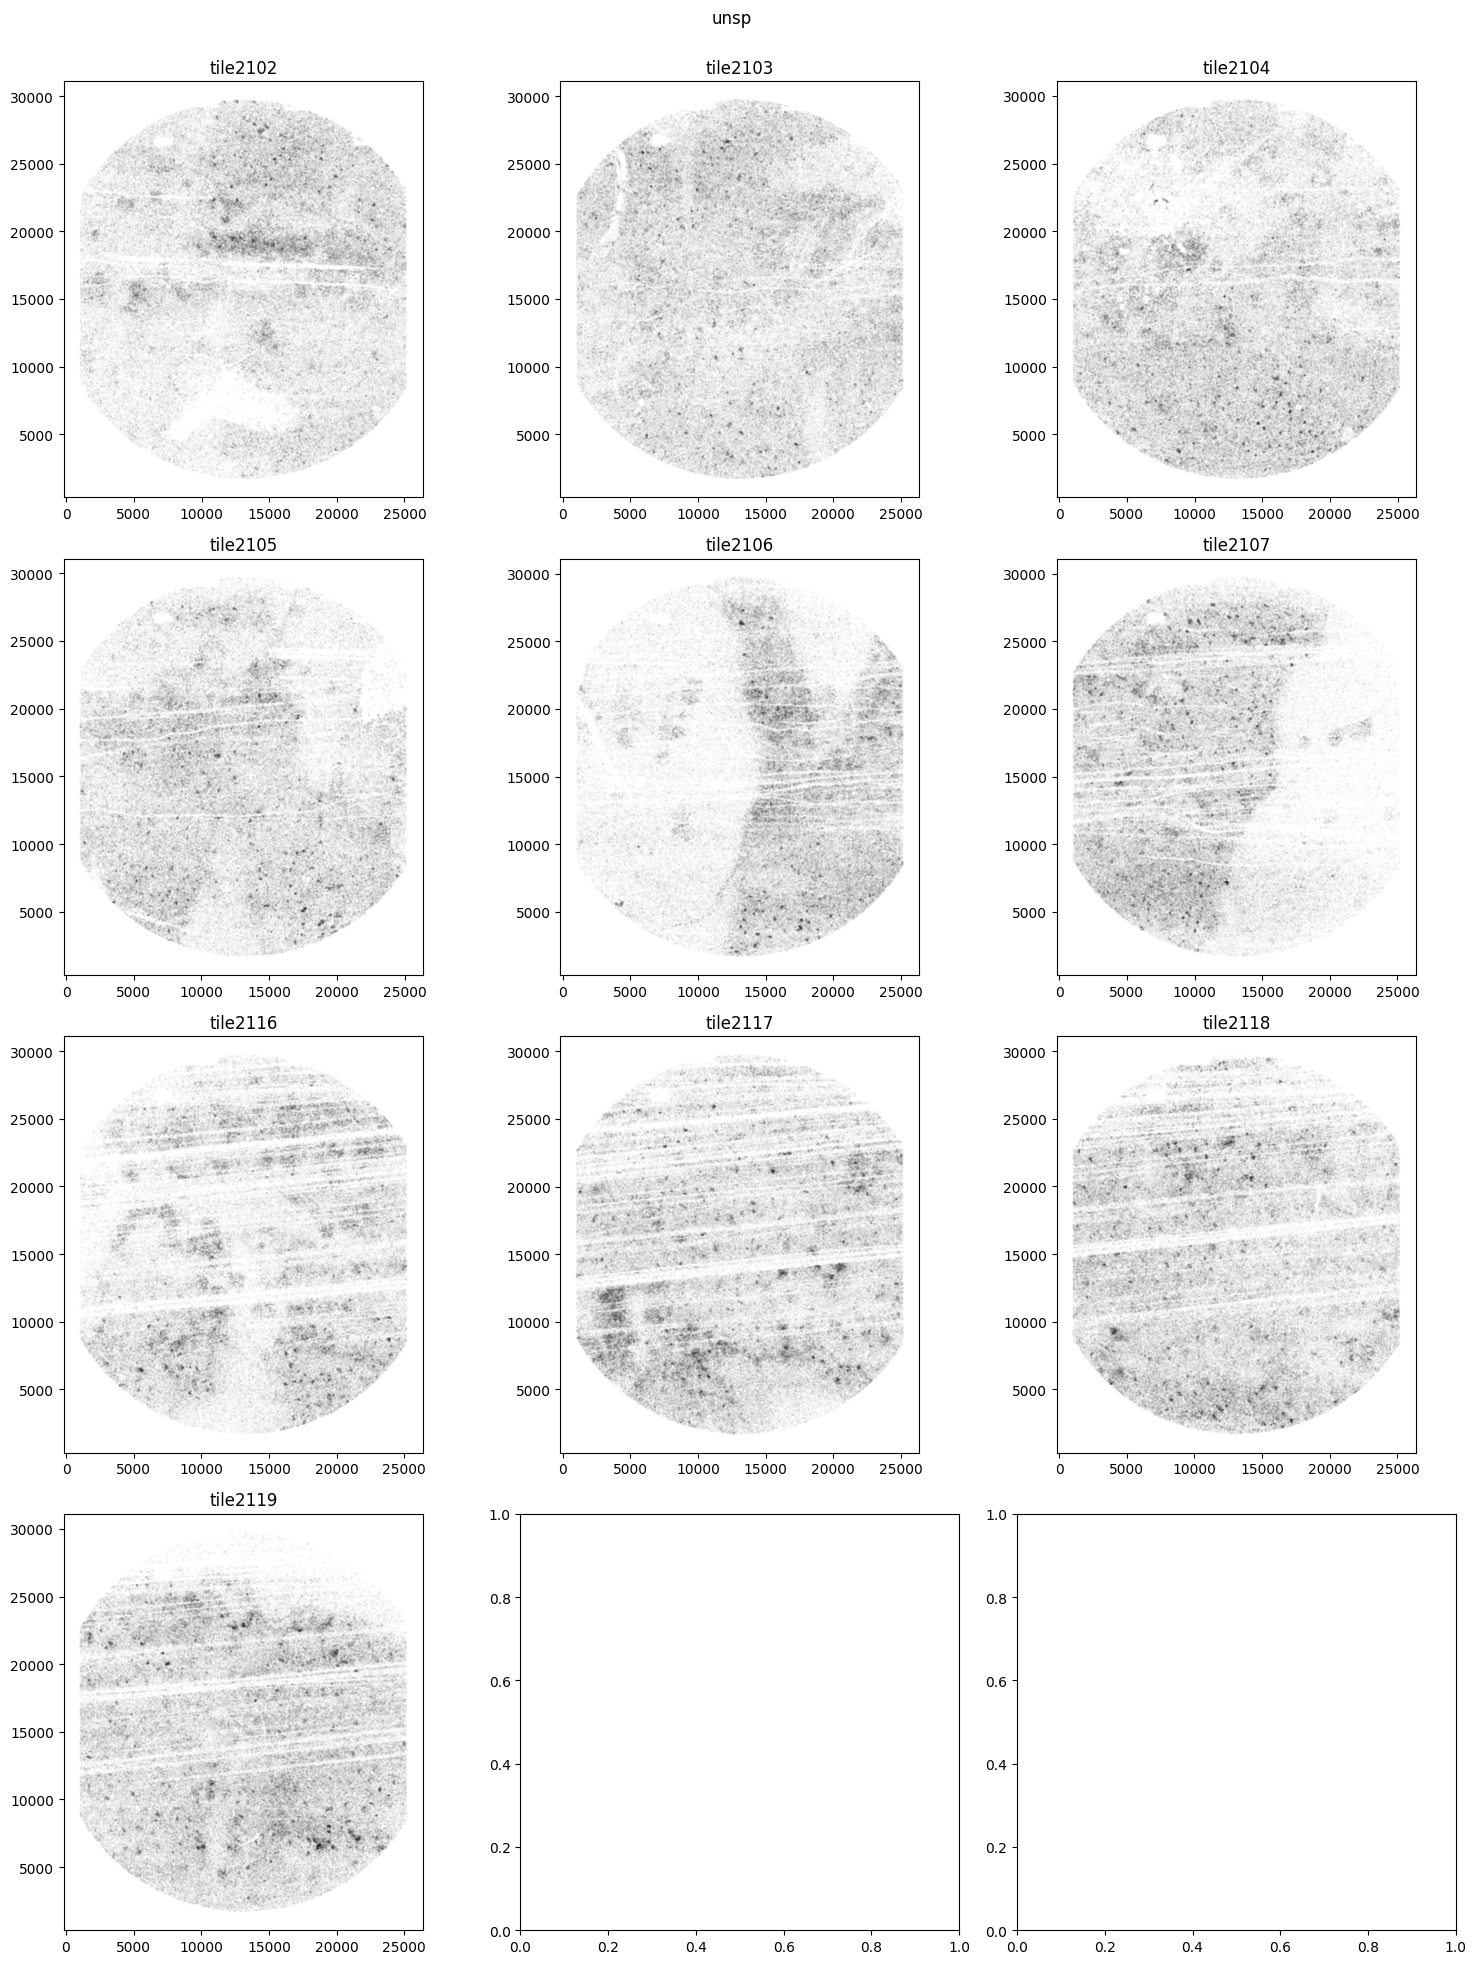

In [9]:
##### viz unsp
fig, ax = plt.subplots(4,3, figsize=(15,20))
for i, t in enumerate(tileList):
    a1 = i//3
    a2 = i%3
    
    t_df = unsp_gbtile.get_group(t) # <<<
    ax[a1,a2].scatter(x=t_df.x,
                      y=t_df.y,
                      c=t_df.umi,
                      vmin=0,
                      vmax=t_df.umi.quantile(.99),
                      s=1,
                      cmap = 'black_alpha',
                      marker='.')
    ax[a1,a2].set_aspect('equal', adjustable='box')
    ax[a1,a2].set_title('tile'+str(t))
    ax[a1,a2].grid(False)
    ax[a1,a2].set_facecolor('white')

plt.suptitle('unsp\n\n')
plt.tight_layout()
fig.savefig('output_fig/step1_unsp.pdf', dpi=200)

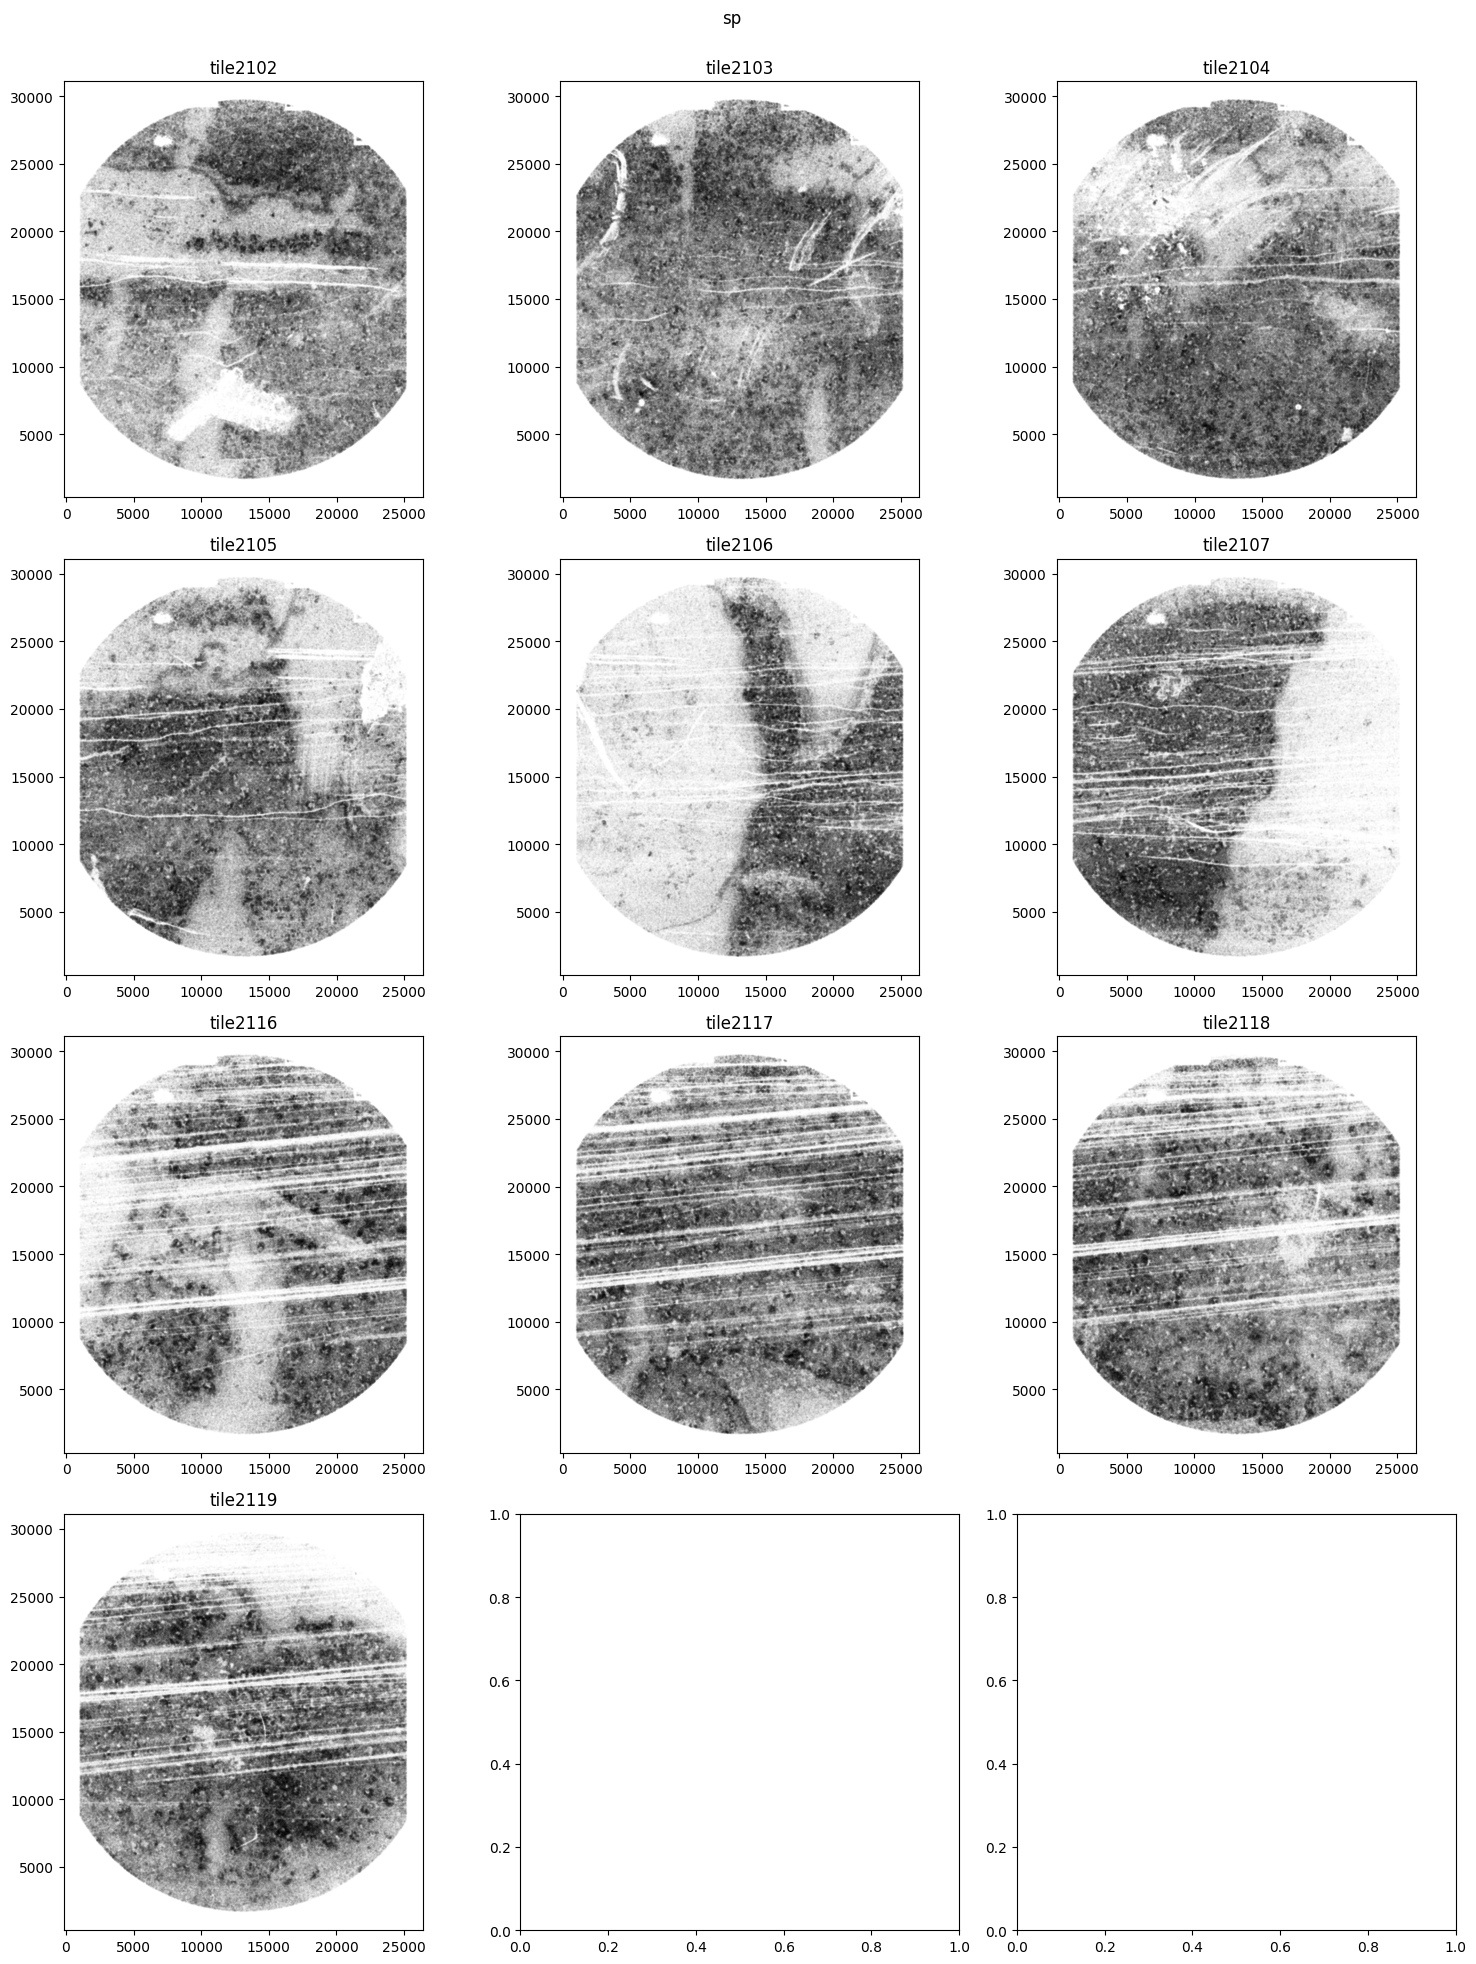

In [10]:
##### viz sp
fig, ax = plt.subplots(4,3, figsize=(15,20))
for i, t in enumerate(tileList):
    a1 = i//3
    a2 = i%3
    
    t_df = sp_gbtile.get_group(t) # <<<
    ax[a1,a2].scatter(x=t_df.x,
                      y=t_df.y,
                      c=t_df.umi,
                      vmin=0,
                      vmax=t_df.umi.quantile(.99),
                      s=1,
                      cmap = 'black_alpha',
                      marker='.')
    ax[a1,a2].set_aspect('equal', adjustable='box')
    ax[a1,a2].set_title('tile'+str(t))
    ax[a1,a2].grid(False)
    ax[a1,a2].set_facecolor('white')

plt.suptitle('sp\n\n')
plt.tight_layout()
fig.savefig('output_fig/step1_sp.pdf', dpi=200)

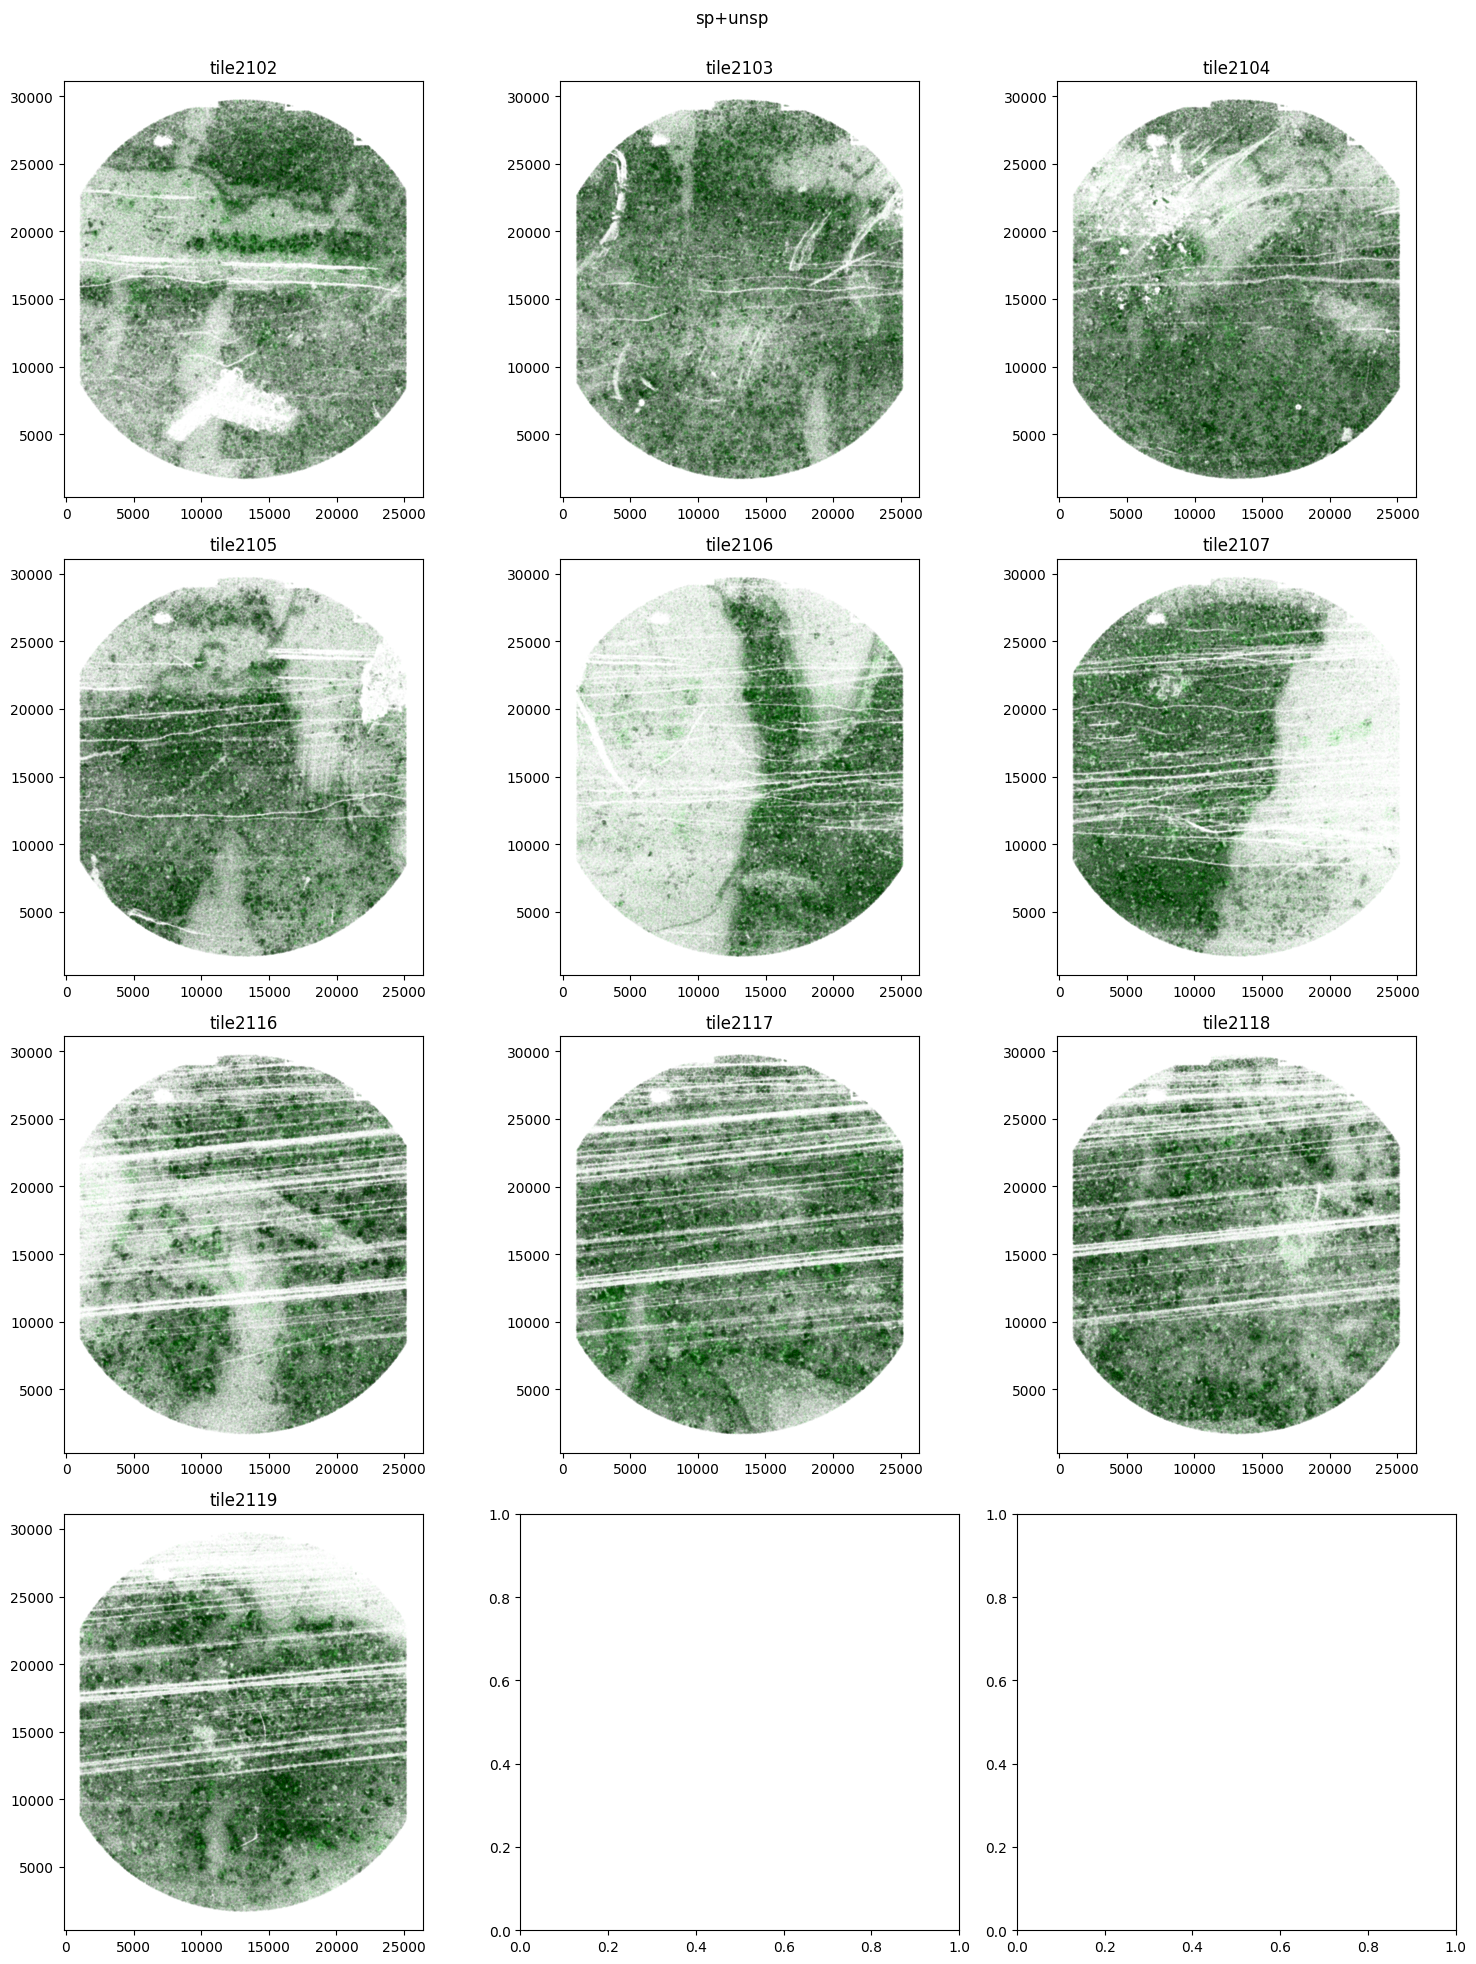

In [11]:
##### viz sp + unsp
fig, ax = plt.subplots(4,3, figsize=(15,20))
for i, t in enumerate(tileList):
    a1 = i//3
    a2 = i%3
    
    t_df1 = sp_gbtile.get_group(t) # <<<
    t_df2 = unsp_gbtile.get_group(t) # <<<
    ax[a1,a2].scatter(x=t_df1.x,
                      y=t_df1.y,
                      c=t_df1.umi,
                      vmin=0,
                      vmax=t_df1.umi.quantile(.99),
                      s=1,
                      cmap = 'black_alpha',
                      marker='.')
    ax[a1,a2].scatter(x=t_df2.x,
                      y=t_df2.y,
                      c=t_df2.umi,
                      vmin=0,
                      vmax=t_df2.umi.quantile(.99),
                      s=1,
                      cmap = 'green_alpha',
                      alpha=0.02,
                      marker='.')
    ax[a1,a2].set_aspect('equal', adjustable='box')
    ax[a1,a2].set_title('tile'+str(t))
    ax[a1,a2].grid(False)
    ax[a1,a2].set_facecolor('white')

plt.suptitle('sp+unsp\n\n')
plt.tight_layout()
fig.savefig('output_fig/step1_spunsp.pdf', dpi=200)